In [2]:
#Importing library
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Importing IMU data
imu_data = pd.read_csv('imu_data.csv');
mag_data = pd.read_csv('mag_data.csv');

In [4]:
# Linear acceleration
lx = imu_data['lx'];
ly = imu_data['ly'];
lz = imu_data['lz'];

In [5]:
# Angular Acceleration
ax = imu_data['ax'];
ay = imu_data['ay'];
az = imu_data['az'];

In [6]:
# Magnetic Data
magx = mag_data['x'];
magy = mag_data['y'];
magz = mag_data['z'];

In [7]:
imu_data.head(5)

,rosbagTimestamp,header,seq,stamp,secs,nsecs,frame_id,orientation,qx,qy,...,angular_velocity,ax,ay,az,angular_velocity_covariance,linear_acceleration,lx,ly,lz,linear_acceleration_covariance
0,1.581090e+18,NaN,1,NaN,1581089638,86011886,"""IMU Message""",NaN,0.890218,0.000308,...,NaN,0.000308,0.000353,0.000312,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",NaN,0.056,0.018,-9.653,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
1,1.581090e+18,NaN,2,NaN,1581089638,109919071,"""IMU Message""",NaN,0.890238,0.000308,...,NaN,-0.000005,-0.000189,-0.000114,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",NaN,0.046,0.044,-9.667,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
2,1.581090e+18,NaN,3,NaN,1581089638,135909080,"""IMU Message""",NaN,0.890238,0.000300,...,NaN,-0.000095,-0.000431,-0.000579,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",NaN,0.048,0.018,-9.692,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
3,1.581090e+18,NaN,4,NaN,1581089638,160660982,"""IMU Message""",NaN,0.890242,0.000300,...,NaN,-0.000466,0.000127,-0.000164,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",NaN,0.051,0.038,-9.680,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
4,1.581090e+18,NaN,5,NaN,1581089638,185847997,"""IMU Message""",NaN,0.890254,0.000296,...,NaN,-0.000289,0.000580,-0.000013,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",NaN,0.050,0.036,-9.678,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"


In [8]:
mag_data.head(5)

,rosbagTimestamp,header,seq,stamp,secs,nsecs,frame_id,magnetic_field,x,y,z,magnetic_field_covariance
0,1581089638086888966,NaN,1,NaN,1581089638,86020946,"""Magnetic field data""",NaN,-0.1435,-0.2014,0.2573,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
1,1581089638110291598,NaN,2,NaN,1581089638,109925031,"""Magnetic field data""",NaN,-0.1445,-0.1957,0.2572,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
2,1581089638136493909,NaN,3,NaN,1581089638,135915994,"""Magnetic field data""",NaN,-0.1446,-0.1979,0.2609,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
3,1581089638161336200,NaN,4,NaN,1581089638,160667896,"""Magnetic field data""",NaN,-0.1412,-0.1969,0.2573,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
4,1581089638186465118,NaN,5,NaN,1581089638,185853958,"""Magnetic field data""",NaN,-0.1424,-0.1968,0.2660,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"


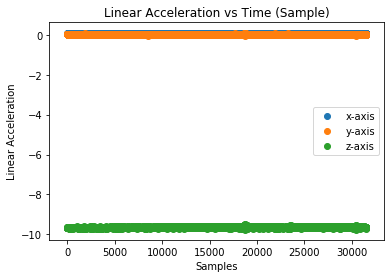

'\n Acceleration in Both X and Y Axis is close to 0 which is as expected and acceleration in Z-axis is close to 9.8 which\n is due to the presence of gravity\n'

In [9]:
# Plotting Linear Acceleration of three axes vs time (samples)
imu_index = imu_data['seq'];
plt.scatter(imu_index, lx, label= 'x-axis');
plt.scatter(imu_index, ly, label= 'y-axis');
plt.scatter(imu_index, lz, label= 'z-axis');
plt.xlabel('Samples');
plt.ylabel('Linear Acceleration');
plt.title('Linear Acceleration vs Time (Sample)');
plt.legend(loc='center right');
plt.show()
'''
 Acceleration in Both X and Y Axis is close to 0 which is as expected and acceleration in Z-axis is close to 9.8 which
 is due to the presence of gravity
'''

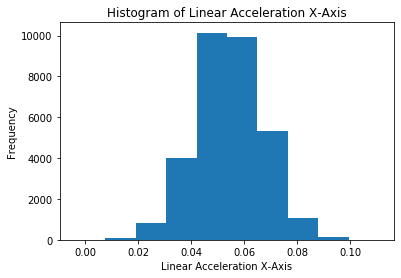

In [10]:
#Histogram of Linear Acceleration
plt.hist(lx);
plt.xlabel('Linear Acceleration X-Axis');
plt.ylabel('Frequency')
plt.title('Histogram of Linear Acceleration X-Axis');
plt.show();

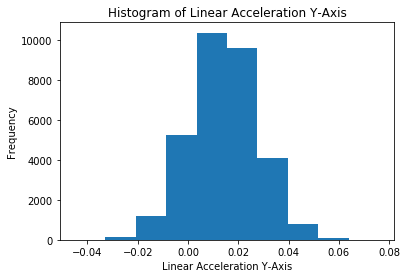

In [11]:
#Histogram of Linear Acceleration
plt.hist(ly);
plt.xlabel('Linear Acceleration Y-Axis');
plt.ylabel('Frequency')
plt.title('Histogram of Linear Acceleration Y-Axis');
plt.show();

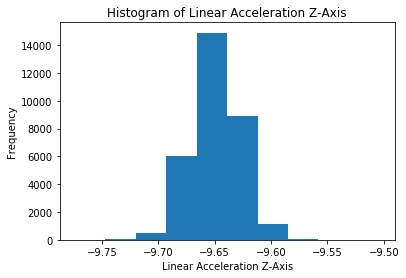

In [12]:
#Histogram of Linear Acceleration
plt.hist(lz);
plt.xlabel('Linear Acceleration Z-Axis');
plt.ylabel('Frequency')
plt.title('Histogram of Linear Acceleration Z-Axis');
plt.show();

In [13]:
### Printing the mean's of the Angular Velocity recorded values
print("Linear Acceleration Mean Values: \n")
print("X-Axis", lx.mean())
print("Y-Axis", ly.mean())
print("Z-Axis", lz.mean())
print("\n\n")

print("Linear Acceleration Standard Deviation Values: \n")
print("X-Axis", lx.std())
print("Y-Axis", ly.std())
print("Z-Axis", lz.std())

'''
Linear Acceleration in X and Y axis has a mean around zero which is as expected and it has a standard deviation of 0.01
The error might be because of small component of gravity in X and Y axis
Linear Acceleration in Z axis is around 9.65m/sec^2 with a standard deviation of 0.02 
'''

Linear Acceleration Mean Values: 

X-Axis 0.05421955866010504
Y-Axis 0.014212414668994073
Z-Axis -9.648911001746344



Linear Acceleration Standard Deviation Values: 

X-Axis 0.01259575472711596
Y-Axis 0.013237227795738774
Z-Axis 0.02075961227495677


'\nLinear Acceleration in X and Y axis has a mean around zero which is as expected and it has a standard deviation of 0.01\nThe error might be because of small component of gravity in X and Y axis\nLinear Acceleration in Z axis is around 9.65m/sec^2 with a standard deviation of 0.02 \n'

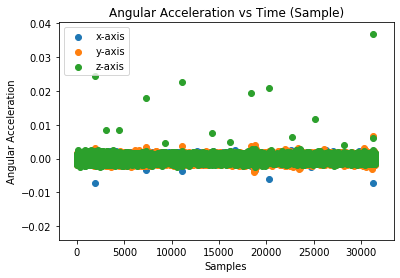

In [14]:
# Plotting Angular Acceleration of three axes vs time (samples)
plt.scatter(imu_index, ax, label= 'x-axis');
plt.scatter(imu_index, ay, label= 'y-axis');
plt.scatter(imu_index, az, label= 'z-axis');
plt.xlabel('Samples');
plt.ylabel('Angular Acceleration');
plt.title('Angular Acceleration vs Time (Sample)');
plt.legend(loc='best');
plt.show()

In [15]:
### Printing the mean's of the Angular Velocity recorded values
print("Angular Acceleration Mean Values: \n")
print("X-Axis", ax.mean())
print("Y-Axis", ay.mean())
print("Z-Axis", az.mean())
print("\n\n")

print("Angular Acceleration Standard Deviation Values: \n")
print("X-Axis", ax.std())
print("Y-Axis", ay.std())
print("Z-Axis", az.std())

Angular Acceleration Mean Values: 

X-Axis 0.00011839765042070238
Y-Axis -3.096831243054475e-05
Z-Axis 4.850319098269541e-05



Angular Acceleration Standard Deviation Values: 

X-Axis 0.0006024707435380378
Y-Axis 0.0006698855971187549
Z-Axis 0.0007354264438687536


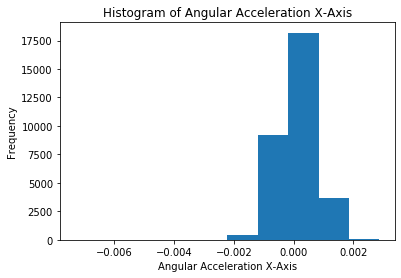

In [16]:
#Histogram of Linear Acceleration
plt.hist(ax);
plt.xlabel('Angular Acceleration X-Axis');
plt.ylabel('Frequency')
plt.title('Histogram of Angular Acceleration X-Axis');
plt.show();

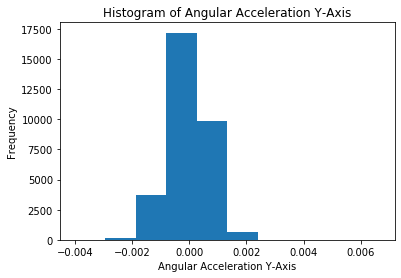

In [17]:
#Histogram of Linear Acceleration
plt.hist(ay);
plt.xlabel('Angular Acceleration Y-Axis');
plt.ylabel('Frequency')
plt.title('Histogram of Angular Acceleration Y-Axis');
plt.show();

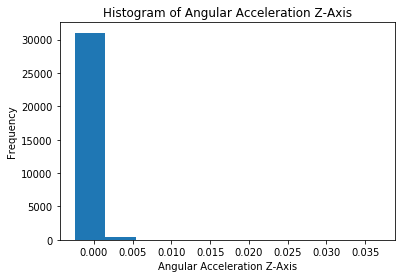

In [18]:
#Histogram of Linear Acceleration
plt.hist(az);
plt.xlabel('Angular Acceleration Z-Axis');
plt.ylabel('Frequency')
plt.title('Histogram of Angular Acceleration Z-Axis');
plt.show();

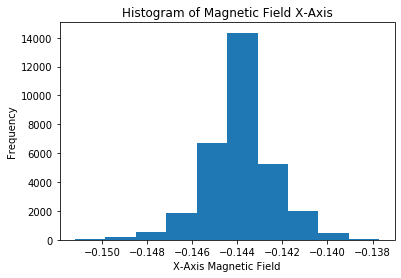

In [19]:
#Magnetic Data
#Histogram of Magnetic Field
plt.hist(magx);
plt.xlabel('X-Axis Magnetic Field');
plt.ylabel('Frequency')
plt.title('Histogram of Magnetic Field X-Axis');
plt.show();

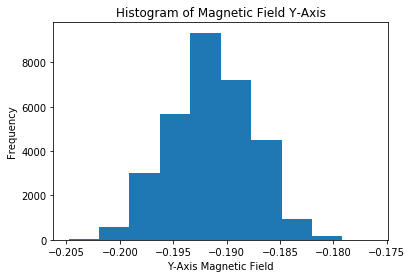

In [20]:
plt.hist(magy);
plt.xlabel('Y-Axis Magnetic Field');
plt.ylabel('Frequency')
plt.title('Histogram of Magnetic Field Y-Axis');
plt.show();

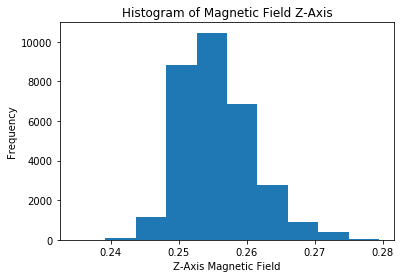

In [21]:
plt.hist(magz);
plt.xlabel('Z-Axis Magnetic Field');
plt.ylabel('Frequency')
plt.title('Histogram of Magnetic Field Z-Axis');
plt.show();

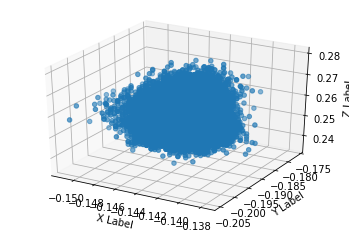

In [22]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(magx, magy, magz)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

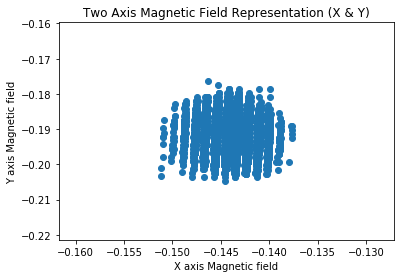

In [23]:
# Plot with Hard Iron and Soft Iron distortions
plt.scatter(magx,magy)
plt.xlabel('X axis Magnetic field');
plt.ylabel('Y axis Magnetic field');
plt.title('Two Axis Magnetic Field Representation (X & Y)')
plt.show()

In [24]:
magx_mean = magx.mean()
magy_mean = magy.mean()
magz_mean = magz.mean()

### Printing the mean's of the Angular Velocity recorded values
print("Magnetic Field Mean Values: \n")
print("X-Axis", magx.mean())
print("Y-Axis", magy.mean())
print("Z-Axis", magz.mean())
print("\n\n")

print("Magnetic Field Standard Deviation Values: \n")
print("X-Axis", magx.std())
print("Y-Axis", magy.std())
print("Z-Axis", magz.std())

Magnetic Field Mean Values: 

X-Axis -0.14385251778003516
Y-Axis -0.1915723615697363
Z-Axis 0.25554931419863375



Magnetic Field Standard Deviation Values: 

X-Axis 0.001609515090479706
Y-Axis 0.0038183224467345516
Z-Axis 0.005279685839016721


In [25]:
# Correcting the Hard Iron Distortions
magx_upd = magx - magx_mean
magy_upd = magy - magy_mean
magz_upd = magz - magz_mean


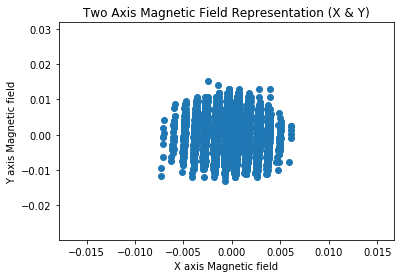

In [26]:
# Plotting after correcting Hard Iron Distortions
plt.scatter(magx_upd,magy_upd)
plt.xlabel('X axis Magnetic field');
plt.ylabel('Y axis Magnetic field');
plt.title('Two Axis Magnetic Field Representation (X & Y)')
plt.show()

In [27]:
# Correcting Soft Iron distortion
magx_max = magx_upd.max()
magy_max = magy_upd.max()
magz_max = magz_upd.max()
magx_min = magx_upd.min()
magy_min = magy_upd.min()
magz_min = magz_upd.min()

sft_cor_x = (magx_max - magx_min)/2.0
sft_cor_y = (magy_max - magy_min)/2.0
sft_cor_z = (magz_max - magz_min)/2.0

mag_corr = (sft_cor_x + sft_cor_y + sft_cor_z) / 3.0;

magx_lat = sft_cor_x/mag_corr * magx_upd
magy_lat = sft_cor_y/mag_corr * magy_upd
magz_lat = sft_cor_z/mag_corr * magz_upd

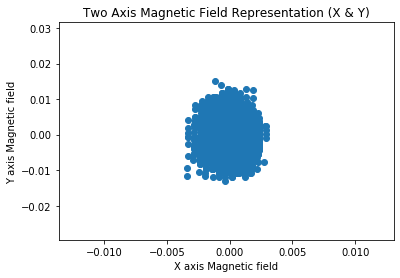

In [28]:
# Plotting after correcting both Hard and Soft Iron Distortions
plt.scatter(magx_lat,magy_lat)
plt.xlabel('X axis Magnetic field');
plt.ylabel('Y axis Magnetic field');
plt.title('Two Axis Magnetic Field Representation (X & Y)')
plt.show()